<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_4_pandas_visualizing/pandas_visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
player_data = pd.read_csv('player_data.csv')
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [9]:
players = pd.read_csv('Players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [91]:
seasons_stats = pd.read_csv('Seasons_Stats.csv')
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Analysis of Players' Starting Ages in Their Careers

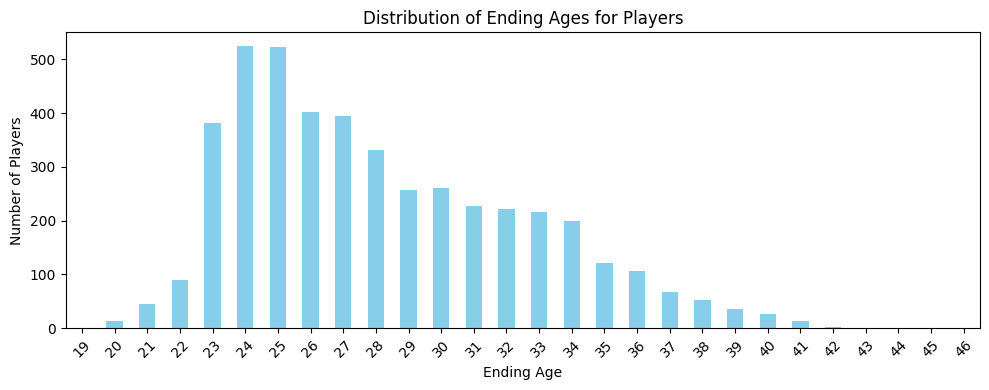

Summary: 
- Most players retire between 23-30 years old, peaking at 24-25.
- Career longevity declines after 30, with few players continuing past 40.
- The drop-off after 35 highlights the physical demands of the sport.


In [31]:
player_data["birth_date"] = pd.to_datetime(player_data["birth_date"], errors='coerce')

player_data = player_data.dropna(subset=["birth_date", "year_end"])

player_data["end_age"] = player_data["year_end"] - player_data["birth_date"].dt.year

end_age_counts = player_data["end_age"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
end_age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ending Ages for Players')
plt.xlabel('Ending Age')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Summary: \n- Most players retire between 23-30 years old, peaking at 24-25.')
print('- Career longevity declines after 30, with few players continuing past 40.')
print('- The drop-off after 35 highlights the physical demands of the sport.')

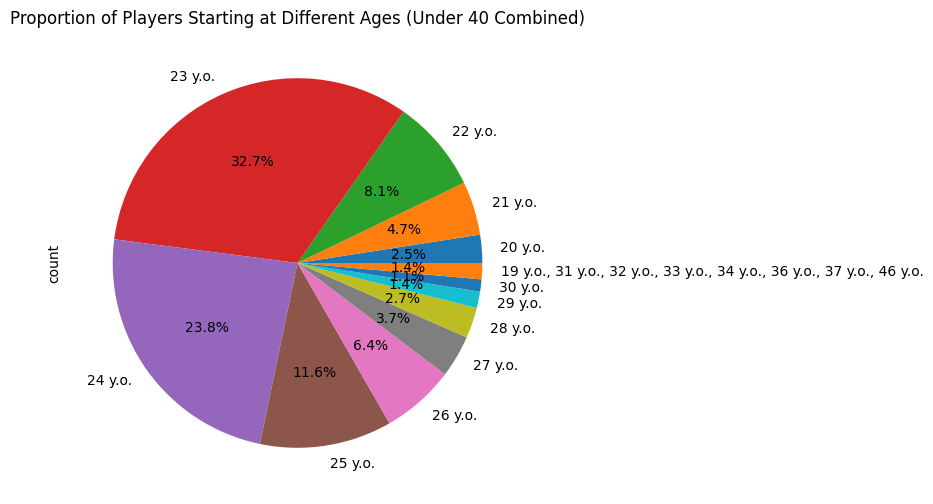

Summary of Player Starting Ages:
- Most players start at 23-24 years old, making up 56.5% of the total.
- A gradual decline follows, with fewer players starting beyond 25 years old.
- Ages with fewer than 40 players are combined, including 19, 31-37, and 46 y.o.
- Early and late starts are rare, reinforcing the trend of players beginning in their early 20s.



In [34]:
player_data = player_data.dropna(subset=["birth_date", "year_start"])
player_data["start_age"] = (player_data["year_start"] - player_data["birth_date"].dt.year).astype(str) + " y.o."
start_age_counts = player_data["start_age"].value_counts().sort_index()

under_40_ages = start_age_counts[start_age_counts < 40]
under_40_sum = under_40_ages.sum()

start_age_counts = start_age_counts[start_age_counts >= 40]
start_age_counts["Listing ages"] = under_40_sum

listing_ages_label = ', '.join(map(str, sorted(under_40_ages.index.tolist())))

start_age_counts.index = start_age_counts.index.tolist()[:-1] + [listing_ages_label]

start_age_counts.plot.pie(labels=start_age_counts.index, figsize=(6, 6), autopct='%1.1f%%', startangle=0)
plt.title('Proportion of Players Starting at Different Ages (Under 40 Combined)')
plt.show()

summary = """Summary of Player Starting Ages:
- Most players start at 23-24 years old, making up 56.5% of the total.
- A gradual decline follows, with fewer players starting beyond 25 years old.
- Ages with fewer than 40 players are combined, including 19, 31-37, and 46 y.o.
- Early and late starts are rare, reinforcing the trend of players beginning in their early 20s.
"""
print(summary)

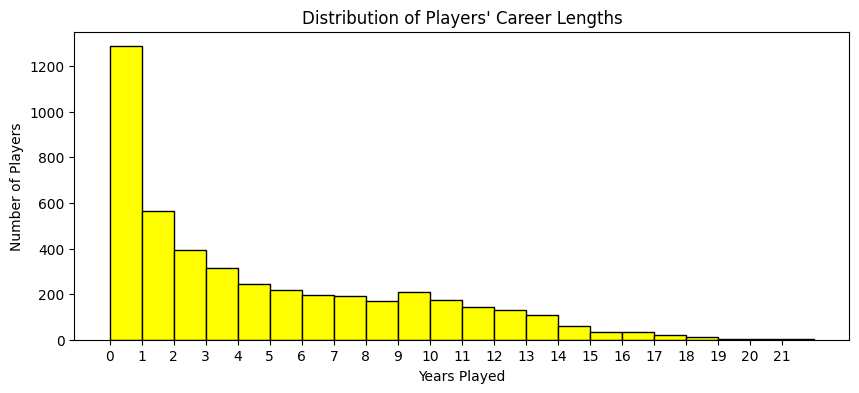

Summary of Players' Career Lengths:
The histogram shows the distribution of players' career lengths, highlighting 
that most players have short careers, with the highest number lasting only one 
year. The number of players declines as career length increases, indicating 
that long careers are relatively rare.



In [49]:
player_data["start_age_num"] = player_data["year_start"] - player_data["birth_date"].dt.year
player_data = player_data.dropna(subset=["start_age_num", "end_age"])
player_data["career_length"] = player_data["end_age"] - player_data["start_age_num"]

plt.figure(figsize=(10, 4))
plt.hist(player_data["career_length"], bins=range(0, player_data["career_length"].max() + 1), color='yellow', edgecolor='black')

plt.title("Distribution of Players' Career Lengths")
plt.xlabel("Years Played")
plt.ylabel("Number of Players")
plt.xticks(range(0, player_data["career_length"].max()))
plt.show()

summary = """Summary of Players' Career Lengths:
The histogram shows the distribution of players' career lengths, highlighting
that most players have short careers, with the highest number lasting only one
year. The number of players declines as career length increases, indicating
that long careers are relatively rare.
"""
print(summary)

In [58]:
player_data = pd.DataFrame(player_data)

fig = px.histogram(player_data, x="weight",
                   nbins=10,
                   title="Distribution of Players' Weights",
                   labels={"weight": "Weight (lbs)"},
                   color_discrete_sequence=["orange"])
fig.update_traces(marker=dict(line=dict(color='blue', width=2)))
fig.update_layout(width=600, height=400)
fig.show()

summary = """Summary of Players' Weight Distribution:
The histogram visualizes the distribution of players' weights, with most players
falling within the 150-250 lbs range. The highest concentration is observed
around 200-250 lbs, while fewer players have extreme weights on either end of
the spectrum. The histogram features orange bars with blue borders for clarity.
"""

In [66]:
player_data = pd.DataFrame(player_data)

college_counts = player_data["college"].value_counts().reset_index()
college_counts.columns = ["College", "Count"]

fig = px.bar(college_counts, x="College", y="Count", title="College Representation in Players Dataset",
             labels={"College": "College", "Count": "Number of Players"}, color_discrete_sequence=["red"])
fig.update_layout(xaxis={'categoryorder':'total descending'}, width=800, height=500)
fig.show()

summary = """Summary: College Representation in Players Dataset:
The bar chart visualizes the number of players from various colleges. A few
colleges, such as the University of Kentucky and other major basketball programs,
have significantly higher player representation. Meanwhile, many colleges have
contributed only a small number of players to the dataset. This distribution
suggests that certain schools act as key pipelines for professional basketball
talent."""
print(summary)

Summary: College Representation in Players Dataset:
The bar chart visualizes the number of players from various colleges. A few 
colleges, such as the University of Kentucky and other major basketball programs, 
have significantly higher player representation. Meanwhile, many colleges have 
contributed only a small number of players to the dataset. This distribution 
suggests that certain schools act as key pipelines for professional basketball 
talent.


In [75]:
players["Height_m"] = players["height"] / 100
players["BMI"] = players["weight"] / (players["Height_m"] ** 2)

fig = px.box(players, y="BMI", points="all", title="Box Plot of Players' BMI",
             labels={"BMI": "Body Mass Index (BMI)"},
             color_discrete_sequence=["blue"])

fig.update_layout(
    xaxis_title="Players",
    yaxis_title="BMI"
)
fig.show()

summary = """BMI Distribution of Players
The box plot shows the BMI distribution among players:
- Median BMI: Around 24-25 (healthy range).
- Most players: BMI between 22 and 26.
- Outliers: Some exceed 30 (heavier build), while a few are below 20 (leaner)."""
print(summary)

BMI Distribution of Players
The box plot shows the BMI distribution among players:
- Median BMI: Around 24-25 (healthy range).
- Most players: BMI between 22 and 26.
- Outliers: Some exceed 30 (heavier build), while a few are below 20 (leaner).


<ipython-input-89-10f6a168acfc>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




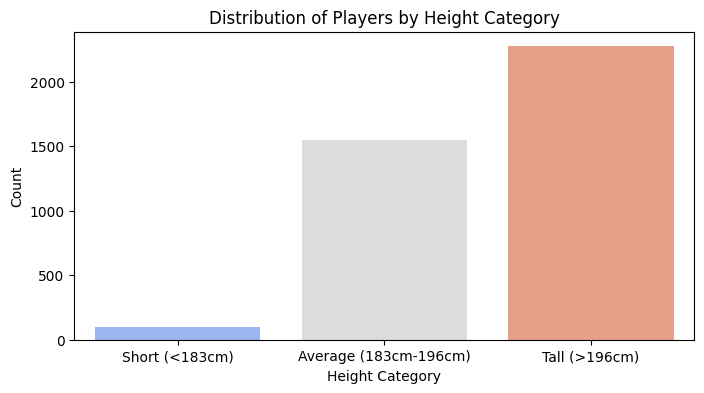

Height Distribution Summary:
- Short (<183 cm): Few players fall in this range.
- Average (183-196 cm): A significant portion of players.
- Tall (>196 cm): The majority, highlighting height advantage.



In [89]:
df = pd.DataFrame(players)

def categorize_height(h):
    if h < 183:
        return "Short (<183cm)"
    elif 183 <= h <= 196:
        return "Average (183cm-196cm)"
    else:
        return "Tall (>196cm)"

df["Height_Category"] = df["height"].apply(categorize_height)

scaler = StandardScaler()
df["Height_Standardized"] = scaler.fit_transform(df[["height"]])

plt.figure(figsize=(8, 4))
sns.countplot(x="Height_Category", data=df, palette="coolwarm")
plt.title("Distribution of Players by Height Category")
plt.xlabel("Height Category")
plt.ylabel("Count")
plt.show()

summary = """Height Distribution Summary:
- Short (<183 cm): Few players fall in this range.
- Average (183-196 cm): A significant portion of players.
- Tall (>196 cm): The majority, highlighting height advantage.
"""
print(summary)

In [94]:
seasons_stats["Year"] = pd.to_numeric(seasons_stats["Year"], errors="coerce")
yearly_stats = seasons_stats.groupby("Year").agg({"PTS": "mean", "FG%": "mean", "TS%": "mean"}).reset_index()

fig = px.line(yearly_stats, x="Year", y=["FG%", "TS%"], title="Shooting Efficiency Trends")
fig.show()

summary = """Summary of Shooting Efficiency Trends:
- FG% rose until the 1980s, then declined slightly and stabilized.
- TS% steadily increased, showing improved shot selection and efficiency.
- Modern Era: Higher efficiency despite FG% fluctuations, driven by better strategies and three-pointers.
"""

<ipython-input-99-6760e2216a7e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-6760e2216a7e>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




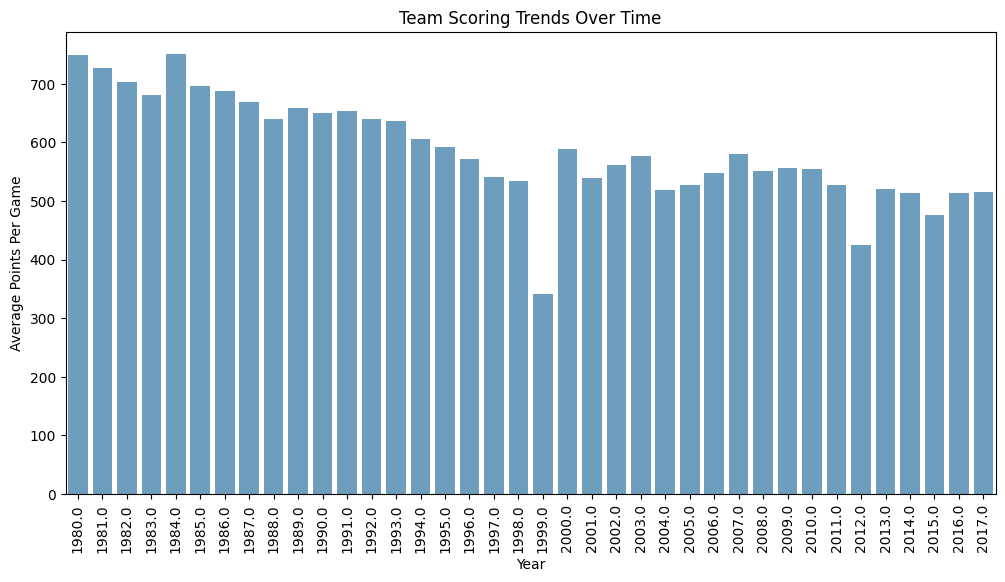

Summary of Team Scoring Trends
The bar chart shows the average points per game (PPG) for teams over different years. Key observations:
- 1980s-1990s: Scoring levels remained relatively high.
- Late 1990s - Early 2000s: A noticeable decline, possibly due to slower pace and defensive focus.
- Recent Years: Scoring has stabilized but remains lower than peak historical levels.



In [99]:
numeric_cols = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'TS%']
df = seasons_stats[['Year', 'Tm'] + numeric_cols]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
team_stats = df.groupby(['Year', 'Tm'])[numeric_cols].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=team_stats, x='Year', y='PTS', ci=None, alpha=0.7)
plt.xticks(rotation=90)
plt.title("Team Scoring Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Points Per Game")
plt.show()

summary = """Summary of Team Scoring Trends
The bar chart shows the average points per game (PPG) for teams over different years. Key observations:
- 1980s-1990s: Scoring levels remained relatively high.
- Late 1990s - Early 2000s: A noticeable decline, possibly due to slower pace and defensive focus.
- Recent Years: Scoring has stabilized but remains lower than peak historical levels.
"""
print(summary)

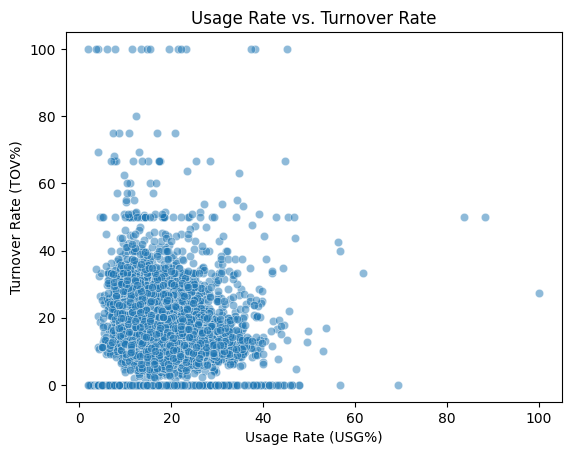

Usage Rate vs. Turnover Rate Analysis
- Most players have a Usage Rate (USG%) below 30%, meaning only a few dominate offensive possessions.
- Turnover Rate (TOV%) varies widely, but higher usage doesn’t always mean more turnovers.
- A cluster of players near low USG% and low TOV% likely represents role players who don’t handle the ball much.
- A few extreme outliers exist at high USG% with low TOV%, indicating elite ball handlers.
- Some players with very high TOV% and low USG% might be inefficient or have data errors.



In [102]:
seasons_stats["USG%"] = pd.to_numeric(seasons_stats["USG%"], errors='coerce')
seasons_stats["TOV%"] = pd.to_numeric(seasons_stats["TOV%"], errors='coerce')
df = seasons_stats.dropna(subset=["USG%", "TOV%"])

# Scatter plot
sns.scatterplot(data=df, x="USG%", y="TOV%", alpha=0.5)
plt.title("Usage Rate vs. Turnover Rate")
plt.xlabel("Usage Rate (USG%)")
plt.ylabel("Turnover Rate (TOV%)")
plt.show()

summary = """Usage Rate vs. Turnover Rate Analysis
- Most players have a Usage Rate (USG%) below 30%, meaning only a few dominate offensive possessions.
- Turnover Rate (TOV%) varies widely, but higher usage doesn’t always mean more turnovers.
- A cluster of players near low USG% and low TOV% likely represents role players who don’t handle the ball much.
- A few extreme outliers exist at high USG% with low TOV%, indicating elite ball handlers.
- Some players with very high TOV% and low USG% might be inefficient or have data errors.
"""
print(summary)